In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_json('data.json')

In [3]:
data.head(10)

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
5,6602,jamaican,"[plain flour, sugar, butter, eggs, fresh ginge..."
6,42779,spanish,"[olive oil, salt, medium shrimp, pepper, garli..."
7,3735,italian,"[sugar, pistachio nuts, white almond bark, flo..."
8,16903,mexican,"[olive oil, purple onion, fresh pineapple, por..."
9,12734,italian,"[chopped tomatoes, fresh basil, garlic, extra-..."


Проверка на наличие отсутствующих значений

In [4]:
data.isna().sum()

id             0
cuisine        0
ingredients    0
dtype: int64

Подсчитаем блюда в каждой кухне

In [5]:
data['cuisine'].value_counts()

cuisine
italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: count, dtype: int64

Теперь в процентном соотношении

In [6]:
data['cuisine'].value_counts()/data['cuisine'].value_counts().sum()*100

cuisine
italian         19.706341
mexican         16.186453
southern_us     10.861367
indian           7.550158
chinese          6.720471
french           6.652587
cajun_creole     3.886961
thai             3.869362
japanese         3.577714
greek            2.954191
spanish          2.486549
korean           2.086790
vietnamese       2.074219
moroccan         2.064163
british          2.021421
filipino         1.898225
irish            1.676975
jamaican         1.322472
russian          1.229446
brazilian        1.174134
Name: count, dtype: float64

In [7]:
data.shape

(39774, 3)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

Графики для визуального сравнения количества

<Axes: xlabel='count', ylabel='cuisine'>

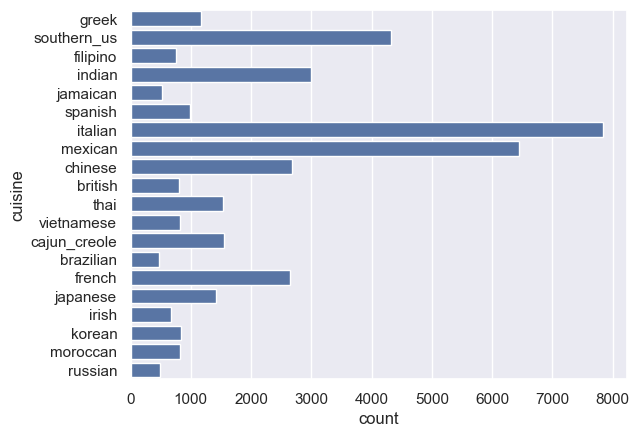

In [9]:
sns.set(style='darkgrid')
sns.countplot(data=data, y='cuisine')

<Axes: xlabel='Percent', ylabel='cuisine'>

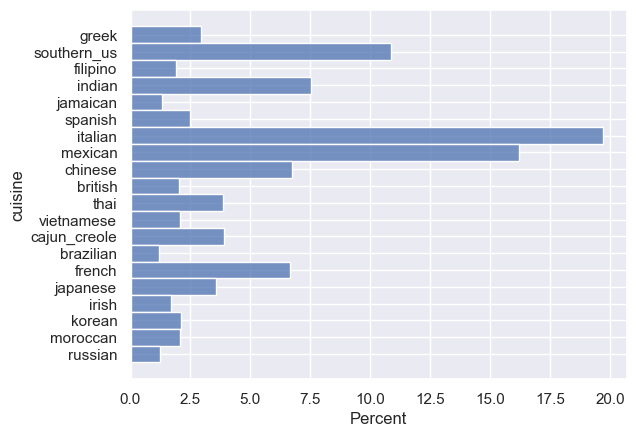

In [10]:
sns.histplot(data=data, y='cuisine', stat='percent')

Id не нужны, поэтому можем исключить первый столбец с помощью drop

In [11]:
data = data.drop('id', axis=1)

In [12]:
data

,cuisine,ingredients
0,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,"[water, vegetable oil, wheat, salt]"
4,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...
39769,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,chinese,"[boneless chicken skinless thigh, minced garli..."


Напишем функцию, которая переведет все элементы в списке в одну строку, это нужно т.к у нас все ингредиенты в одном списке

In [13]:
def massive_to_string(massive):
    string = ' '.join(massive)
    return string

Посмотрим из чего состоит столбец ингредиентов

In [14]:
data['ingredients'][0]

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

In [15]:
# Библиотека для обработки языка (текста, слов, и тд)
import nltk
# Скачиваем базу стоп слов
nltk.download("stopwords", quiet=True)
from nltk.corpus import stopwords
# Ипортируем пунктационные знаки и другие символы
from string import punctuation
# Закинем в переменную стоп слова на английском
english_stopwords = stopwords.words("english")

In [16]:
# Посмотрим как выглядит столбец
data['ingredients']

0        [romaine lettuce, black olives, grape tomatoes...
1        [plain flour, ground pepper, salt, tomatoes, g...
2        [eggs, pepper, salt, mayonaise, cooking oil, g...
3                      [water, vegetable oil, wheat, salt]
4        [black pepper, shallots, cornflour, cayenne pe...
                               ...                        
39769    [light brown sugar, granulated sugar, butter, ...
39770    [KRAFT Zesty Italian Dressing, purple onion, b...
39771    [eggs, citrus fruit, raisins, sourdough starte...
39772    [boneless chicken skinless thigh, minced garli...
39773    [green chile, jalapeno chilies, onions, ground...
Name: ingredients, Length: 39774, dtype: object

In [17]:
data['ingredients'] = data['ingredients'].map(lambda x: massive_to_string(x))
data

,cuisine,ingredients
0,greek,romaine lettuce black olives grape tomatoes ga...
1,southern_us,plain flour ground pepper salt tomatoes ground...
2,filipino,eggs pepper salt mayonaise cooking oil green c...
3,indian,water vegetable oil wheat salt
4,indian,black pepper shallots cornflour cayenne pepper...
...,...,...
39769,irish,light brown sugar granulated sugar butter warm...
39770,italian,KRAFT Zesty Italian Dressing purple onion broc...
39771,irish,eggs citrus fruit raisins sourdough starter fl...
39772,chinese,boneless chicken skinless thigh minced garlic ...


In [18]:
data['ingredients'] = data['ingredients'].map(lambda x: x.lower())
data

,cuisine,ingredients
0,greek,romaine lettuce black olives grape tomatoes ga...
1,southern_us,plain flour ground pepper salt tomatoes ground...
2,filipino,eggs pepper salt mayonaise cooking oil green c...
3,indian,water vegetable oil wheat salt
4,indian,black pepper shallots cornflour cayenne pepper...
...,...,...
39769,irish,light brown sugar granulated sugar butter warm...
39770,italian,kraft zesty italian dressing purple onion broc...
39771,irish,eggs citrus fruit raisins sourdough starter fl...
39772,chinese,boneless chicken skinless thigh minced garlic ...


In [19]:
data['ingredients'] = data['ingredients'].map(lambda x: x.split(' '))
data

,cuisine,ingredients
0,greek,"[romaine, lettuce, black, olives, grape, tomat..."
1,southern_us,"[plain, flour, ground, pepper, salt, tomatoes,..."
2,filipino,"[eggs, pepper, salt, mayonaise, cooking, oil, ..."
3,indian,"[water, vegetable, oil, wheat, salt]"
4,indian,"[black, pepper, shallots, cornflour, cayenne, ..."
...,...,...
39769,irish,"[light, brown, sugar, granulated, sugar, butte..."
39770,italian,"[kraft, zesty, italian, dressing, purple, onio..."
39771,irish,"[eggs, citrus, fruit, raisins, sourdough, star..."
39772,chinese,"[boneless, chicken, skinless, thigh, minced, g..."


In [20]:
# Обработаем наш столбик
# Проверяем для каждой строки в нашем столбике, есть ли слово в ингредиенте в списке стоп-слов
# Проверяем не пустой ли спискок
# Проверяем нет ли в списке '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
# map позволяет использовать одну функцию для всего столбца
data['ingredients'] = data['ingredients'].map(lambda x: [word for word in x 
                                                        if word not in english_stopwords
                                                        and word != ' '
                                                        and word.strip() not in punctuation
                                                        ])

In [21]:
data

,cuisine,ingredients
0,greek,"[romaine, lettuce, black, olives, grape, tomat..."
1,southern_us,"[plain, flour, ground, pepper, salt, tomatoes,..."
2,filipino,"[eggs, pepper, salt, mayonaise, cooking, oil, ..."
3,indian,"[water, vegetable, oil, wheat, salt]"
4,indian,"[black, pepper, shallots, cornflour, cayenne, ..."
...,...,...
39769,irish,"[light, brown, sugar, granulated, sugar, butte..."
39770,italian,"[kraft, zesty, italian, dressing, purple, onio..."
39771,irish,"[eggs, citrus, fruit, raisins, sourdough, star..."
39772,chinese,"[boneless, chicken, skinless, thigh, minced, g..."


In [22]:
nltk.download('wordnet', quiet=True)
from nltk.stem import WordNetLemmatizer
#лемматация позволяет вернуть слово в его базовую форму(только корень берем)
wnl = WordNetLemmatizer()
data['ingredients'] = data['ingredients'].map(lambda x: [wnl.lemmatize(word) for word in x])
data

,cuisine,ingredients
0,greek,"[romaine, lettuce, black, olive, grape, tomato..."
1,southern_us,"[plain, flour, ground, pepper, salt, tomato, g..."
2,filipino,"[egg, pepper, salt, mayonaise, cooking, oil, g..."
3,indian,"[water, vegetable, oil, wheat, salt]"
4,indian,"[black, pepper, shallot, cornflour, cayenne, p..."
...,...,...
39769,irish,"[light, brown, sugar, granulated, sugar, butte..."
39770,italian,"[kraft, zesty, italian, dressing, purple, onio..."
39771,irish,"[egg, citrus, fruit, raisin, sourdough, starte..."
39772,chinese,"[boneless, chicken, skinless, thigh, minced, g..."


In [23]:
# Вот как теперь выглядит наш столбик
data['ingredients']

0        [romaine, lettuce, black, olive, grape, tomato...
1        [plain, flour, ground, pepper, salt, tomato, g...
2        [egg, pepper, salt, mayonaise, cooking, oil, g...
3                     [water, vegetable, oil, wheat, salt]
4        [black, pepper, shallot, cornflour, cayenne, p...
                               ...                        
39769    [light, brown, sugar, granulated, sugar, butte...
39770    [kraft, zesty, italian, dressing, purple, onio...
39771    [egg, citrus, fruit, raisin, sourdough, starte...
39772    [boneless, chicken, skinless, thigh, minced, g...
39773    [green, chile, jalapeno, chilies, onion, groun...
Name: ingredients, Length: 39774, dtype: object

In [24]:
data['ingredients'] = data['ingredients'].map(lambda x: massive_to_string(x))
data['ingredients']

0        romaine lettuce black olive grape tomato garli...
1        plain flour ground pepper salt tomato ground b...
2        egg pepper salt mayonaise cooking oil green ch...
3                           water vegetable oil wheat salt
4        black pepper shallot cornflour cayenne pepper ...
                               ...                        
39769    light brown sugar granulated sugar butter warm...
39770    kraft zesty italian dressing purple onion broc...
39771    egg citrus fruit raisin sourdough starter flou...
39772    boneless chicken skinless thigh minced garlic ...
39773    green chile jalapeno chilies onion ground blac...
Name: ingredients, Length: 39774, dtype: object

С обработкой данных завершено, теперь переходим к моделям

In [25]:
X = data['ingredients']

In [26]:
y = data['cuisine']
y

0              greek
1        southern_us
2           filipino
3             indian
4             indian
            ...     
39769          irish
39770        italian
39771          irish
39772        chinese
39773        mexican
Name: cuisine, Length: 39774, dtype: object

In [27]:
# 20% валид, 16% тест.
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Наблюдается небольшой дисбаланс в классах

In [28]:
y_train.value_counts()/y_train.value_counts().sum()*100

cuisine
italian         19.556079
mexican         16.256138
southern_us     10.748379
indian           7.460224
chinese          6.933805
french           6.623453
cajun_creole     3.893145
thai             3.791004
japanese         3.535651
greek            2.977804
spanish          2.549597
vietnamese       2.121391
moroccan         2.097820
british          2.086034
korean           2.019250
filipino         1.905323
irish            1.610686
jamaican         1.331762
russian          1.276763
brazilian        1.225692
Name: count, dtype: float64

In [29]:
y_train.value_counts()

cuisine
italian         4978
mexican         4138
southern_us     2736
indian          1899
chinese         1765
french          1686
cajun_creole     991
thai             965
japanese         900
greek            758
spanish          649
vietnamese       540
moroccan         534
british          531
korean           514
filipino         485
irish            410
jamaican         339
russian          325
brazilian        312
Name: count, dtype: int64

In [30]:
y_valid.value_counts()/y_valid.value_counts().sum()*100

cuisine
italian         19.698303
mexican         16.794469
southern_us     10.659962
indian           7.567568
french           6.913891
chinese          6.411062
cajun_creole     4.123193
thai             3.959774
japanese         3.570082
greek            3.130107
spanish          2.287869
korean           2.086738
moroccan         2.086738
british          1.973602
irish            1.898177
vietnamese       1.810182
filipino         1.709617
jamaican         1.143935
russian          1.118793
brazilian        1.055940
Name: count, dtype: float64

In [31]:
y_valid.value_counts()

cuisine
italian         1567
mexican         1336
southern_us      848
indian           602
french           550
chinese          510
cajun_creole     328
thai             315
japanese         284
greek            249
spanish          182
korean           166
moroccan         166
british          157
irish            151
vietnamese       144
filipino         136
jamaican          91
russian           89
brazilian         84
Name: count, dtype: int64

In [32]:
y_test.value_counts()/y_test.value_counts().sum()*100

cuisine
italian         20.317410
mexican         15.147706
southern_us     11.565053
indian           7.888121
french           6.442489
chinese          6.253928
thai             4.069767
japanese         3.755500
cajun_creole     3.566939
greek            2.639849
spanish          2.482715
korean           2.357008
vietnamese       2.215588
filipino         2.105594
moroccan         1.901320
british          1.822753
irish            1.665619
jamaican         1.508485
russian          1.178504
brazilian        1.115651
Name: count, dtype: float64

In [33]:
y_test.value_counts()

cuisine
italian         1293
mexican          964
southern_us      736
indian           502
french           410
chinese          398
thai             259
japanese         239
cajun_creole     227
greek            168
spanish          158
korean           150
vietnamese       141
filipino         134
moroccan         121
british          116
irish            106
jamaican          96
russian           75
brazilian         71
Name: count, dtype: int64

Все разделилось как и раньше

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [35]:
# векторизатор, слова = цифры, импортировали класс, который это сделает
vectorizer = TfidfVectorizer()

In [36]:
# На обучающей выборке обучили векторизатор
X_transformed_train = vectorizer.fit_transform(X_train)
# Изменили валид выборку
X_transformed_valid = vectorizer.transform(X_valid)

In [37]:
# Создаем модельку стохастического градиентного спуска, то же самое что и градиентный спуск, но градиент ищем на подвыборке, а не на всей выборке
model_sgd = SGDClassifier(random_state=42)
model_sgd.fit(X_transformed_train, y_train)

SGDClassifier(random_state=42)

In [38]:
predicted_sgd = model_sgd.predict(X_transformed_valid)
print(metrics.classification_report(predicted_sgd, y_valid))

              precision    recall  f1-score   support

   brazilian       0.49      0.67      0.57        61
     british       0.26      0.77      0.39        53
cajun_creole       0.68      0.79      0.73       283
     chinese       0.89      0.74      0.81       611
    filipino       0.46      0.68      0.55        93
      french       0.61      0.63      0.62       526
       greek       0.64      0.74      0.69       214
      indian       0.90      0.85      0.88       639
       irish       0.36      0.68      0.47        81
     italian       0.92      0.78      0.84      1846
    jamaican       0.65      0.87      0.74        68
    japanese       0.69      0.80      0.74       245
      korean       0.70      0.83      0.76       139
     mexican       0.93      0.89      0.91      1398
    moroccan       0.78      0.86      0.82       152
     russian       0.45      0.57      0.50        70
 southern_us       0.78      0.67      0.72       989
     spanish       0.41    

In [39]:
# метод ближайших соседей
model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(X_transformed_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [40]:
predicted_knn = model_knn.predict(X_transformed_valid)
print(metrics.classification_report(predicted_knn, y_valid))

              precision    recall  f1-score   support

   brazilian       0.57      0.60      0.59        80
     british       0.45      0.63      0.52       111
cajun_creole       0.70      0.72      0.71       322
     chinese       0.88      0.68      0.77       664
    filipino       0.43      0.65      0.52        89
      french       0.60      0.55      0.58       601
       greek       0.62      0.72      0.66       215
      indian       0.84      0.85      0.84       601
       irish       0.50      0.66      0.57       113
     italian       0.87      0.74      0.80      1831
    jamaican       0.59      0.77      0.67        70
    japanese       0.62      0.84      0.71       209
      korean       0.72      0.80      0.76       149
     mexican       0.89      0.83      0.86      1433
    moroccan       0.70      0.81      0.75       145
     russian       0.35      0.65      0.45        48
 southern_us       0.68      0.71      0.70       818
     spanish       0.39    

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
# Обучим лес деревьев
model_forest = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
model_forest.fit(X_transformed_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [43]:
predicted_forest = model_forest.predict(X_transformed_valid)
print(metrics.classification_report(predicted_forest, y_valid))

C:\Users\Olga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

   brazilian       0.00      0.00      0.00         0
     british       0.00      0.00      0.00         0
cajun_creole       0.00      0.00      0.00         0
     chinese       0.42      0.76      0.54       283
    filipino       0.00      0.00      0.00         0
      french       0.00      0.00      0.00         0
       greek       0.00      0.00      0.00         0
      indian       0.39      0.94      0.55       248
       irish       0.00      0.00      0.00         0
     italian       1.00      0.26      0.41      6029
    jamaican       0.00      0.00      0.00         0
    japanese       0.00      0.00      0.00         0
      korean       0.00      0.00      0.00         0
     mexican       0.75      0.72      0.74      1395
    moroccan       0.00      0.00      0.00         0
     russian       0.00      0.00      0.00         0
 southern_us       0.00      0.00      0.00         0
     spanish       0.00    

C:\Users\Olga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Olga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
model_sgd_2 = SGDClassifier(random_state=42)
model_sgd_2.fit(X_transformed_train, y_train)

SGDClassifier(random_state=42)

In [45]:
predicted_sgd_2 = model_sgd_2.predict(X_transformed_valid)
print(metrics.classification_report(predicted_sgd_2, y_valid))

              precision    recall  f1-score   support

   brazilian       0.49      0.67      0.57        61
     british       0.26      0.77      0.39        53
cajun_creole       0.68      0.79      0.73       283
     chinese       0.89      0.74      0.81       611
    filipino       0.46      0.68      0.55        93
      french       0.61      0.63      0.62       526
       greek       0.64      0.74      0.69       214
      indian       0.90      0.85      0.88       639
       irish       0.36      0.68      0.47        81
     italian       0.92      0.78      0.84      1846
    jamaican       0.65      0.87      0.74        68
    japanese       0.69      0.80      0.74       245
      korean       0.70      0.83      0.76       139
     mexican       0.93      0.89      0.91      1398
    moroccan       0.78      0.86      0.82       152
     russian       0.45      0.57      0.50        70
 southern_us       0.78      0.67      0.72       989
     spanish       0.41    

In [46]:
# До этого мы за координату в векторе брали одно слово, сейчас будем брать 1 и 2, т.е м.б просто огурец, а м.б отсрый чили
vectorizer = TfidfVectorizer(ngram_range=(1, 2))

In [47]:
X_transformed_train2 = vectorizer.fit_transform(X_train)
X_transformed_valid2 = vectorizer.transform(X_valid)

In [48]:
model_sgd_21 = SGDClassifier(penalty='elasticnet', class_weight='balanced', random_state=42)
model_sgd_21.fit(X_transformed_train2, y_train)

SGDClassifier(class_weight='balanced', penalty='elasticnet', random_state=42)

In [49]:
predicted_sgd_21 = model_sgd_21.predict(X_transformed_valid2)
print(metrics.classification_report(predicted_sgd_21, y_valid))

              precision    recall  f1-score   support

   brazilian       0.65      0.44      0.52       126
     british       0.55      0.46      0.50       189
cajun_creole       0.79      0.69      0.74       379
     chinese       0.82      0.80      0.81       524
    filipino       0.57      0.47      0.51       164
      french       0.45      0.70      0.55       358
       greek       0.76      0.63      0.69       303
      indian       0.87      0.87      0.87       601
       irish       0.68      0.39      0.50       259
     italian       0.78      0.89      0.83      1382
    jamaican       0.79      0.53      0.64       135
    japanese       0.69      0.79      0.74       249
      korean       0.80      0.71      0.75       188
     mexican       0.89      0.92      0.91      1294
    moroccan       0.83      0.61      0.70       225
     russian       0.63      0.27      0.38       207
 southern_us       0.62      0.77      0.69       676
     spanish       0.58    

In [50]:
# Используем градиентный бустинг
import xgboost as xgb

In [51]:
# Классы должны соответствовать числам
cuisines = {'brazilian':1,       
     'british':2,       
     'cajun_creole':3,       
     'chinese':4,      
     'filipino':5,      
     'french':6,      
     'greek':7,       
     'indian':8,       
     'irish':9,       
     'italian':10,       
     'jamaican':11,       
     'japanese':12,       
     'korean':13,      
     'mexican':14,       
     'moroccan':15,       
     'russian':16,       
     'southern_us':17,       
     'spanish':18,       
     'thai':19,       
     'vietnamese':0}

# Переделали
y_train_xgb = pd.DataFrame(y_train)['cuisine'].map(cuisines)
y_valid_xgb = pd.DataFrame(y_valid)['cuisine'].map(cuisines)
y_valid_xgb

21513     4
1796     18
21861     7
26571     8
28720    10
         ..
9473     14
1530     10
317       4
38284     8
2929      6
Name: cuisine, Length: 7955, dtype: int64

In [52]:
# Градиентный бустинг: Суть метода в обучении каждой последующей модели на ошибках предыдущей. В данном случае модель состоит из деревьев. Если, например,
# у нас 15 кухонь, то первая модель обучается на всей выборке и правильно определяет 5 из них, а вторая модель уже учится на остальных 10, которые первая
# распознавать не умеет.
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax'
    , n_estimators=250
    , learning_rate=0.10
    , colsample_bytree=0.70
    , max_depth=3
    , n_jobs=4,
    num_class=20
)
xgb_model.fit(
    X_transformed_train, y_train_xgb
    , early_stopping_rounds=5
    , eval_set=[(X_transformed_valid, y_valid_xgb)]
    , verbose=False
)


C:\Users\Olga\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=4, num_class=20,
              num_parallel_tree=None, ...)

In [53]:
predicted_xgb = xgb_model.predict(X_transformed_valid)
print(metrics.classification_report(predicted_xgb, y_valid_xgb))

              precision    recall  f1-score   support

           0       0.50      0.65      0.56       111
           1       0.55      0.82      0.66        56
           2       0.31      0.70      0.43        70
           3       0.68      0.83      0.75       270
           4       0.84      0.76      0.80       561
           5       0.43      0.69      0.53        85
           6       0.59      0.57      0.58       564
           7       0.66      0.77      0.71       214
           8       0.87      0.86      0.87       604
           9       0.46      0.76      0.57        91
          10       0.90      0.74      0.82      1910
          11       0.55      0.88      0.68        57
          12       0.68      0.83      0.75       233
          13       0.70      0.86      0.77       136
          14       0.92      0.90      0.91      1371
          15       0.75      0.86      0.80       144
          16       0.44      0.68      0.53        57
          17       0.76    

In [54]:
xgb_model = xgb.XGBClassifier(
    booster='gblinear',
    objective='multi:softmax'
    , n_estimators=1000
    , learning_rate=0.05
    , n_jobs=4,
)
xgb_model.fit(
    X_transformed_train, y_train_xgb
    , early_stopping_rounds=5
    , eval_set=[(X_transformed_valid, y_valid_xgb)]
    , verbose=False
)

C:\Users\Olga\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=4,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [55]:
predicted_xgb = xgb_model.predict(X_transformed_valid)
print(metrics.classification_report(predicted_xgb, y_valid_xgb))

              precision    recall  f1-score   support

           0       0.54      0.59      0.57       132
           1       0.56      0.72      0.63        65
           2       0.49      0.59      0.53       131
           3       0.65      0.73      0.69       293
           4       0.84      0.76      0.80       567
           5       0.56      0.70      0.62       109
           6       0.64      0.63      0.63       560
           7       0.67      0.74      0.71       227
           8       0.87      0.87      0.87       602
           9       0.46      0.61      0.52       114
          10       0.88      0.81      0.84      1705
          11       0.67      0.90      0.77        68
          12       0.68      0.77      0.72       252
          13       0.73      0.77      0.75       159
          14       0.93      0.90      0.91      1371
          15       0.76      0.85      0.80       148
          16       0.43      0.45      0.44        85
          17       0.76    

In [56]:
from sklearn.metrics import roc_auc_score

In [57]:
xgb_model = xgb.XGBClassifier(
    objective= 'multi:softmax'
    , n_estimators=250
    , learning_rate=0.10
    , colsample_bytree=0.70
    , max_depth=3
    , n_jobs=4,
    num_class=20,
)
xgb_model.fit(
    X_transformed_train, y_train_xgb
    , early_stopping_rounds=5
    , eval_set=[(X_transformed_valid, y_valid_xgb)]
    , verbose=False
)


C:\Users\Olga\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=4, num_class=20,
              num_parallel_tree=None, ...)

In [58]:
predicted_xgb = xgb_model.predict(X_transformed_valid)
print(metrics.classification_report(predicted_xgb, y_valid_xgb))

              precision    recall  f1-score   support

           0       0.50      0.65      0.56       111
           1       0.55      0.82      0.66        56
           2       0.31      0.70      0.43        70
           3       0.68      0.83      0.75       270
           4       0.84      0.76      0.80       561
           5       0.43      0.69      0.53        85
           6       0.59      0.57      0.58       564
           7       0.66      0.77      0.71       214
           8       0.87      0.86      0.87       604
           9       0.46      0.76      0.57        91
          10       0.90      0.74      0.82      1910
          11       0.55      0.88      0.68        57
          12       0.68      0.83      0.75       233
          13       0.70      0.86      0.77       136
          14       0.92      0.90      0.91      1371
          15       0.75      0.86      0.80       144
          16       0.44      0.68      0.53        57
          17       0.76    

# 2. Подбор гиперпараметров для KNN

In [59]:
grid_space = {'n_neighbors': [1,5, 10, 15, 20],
       'p': [1, 2]}

In [60]:
model = KNeighborsClassifier()
grid = GridSearchCV(model, param_grid=grid_space)
final_model = grid.fit(X_transformed_train, y_train)
final_model.best_params_

{'n_neighbors': 15, 'p': 2}

In [61]:
predict = final_model.best_estimator_.predict(X_transformed_valid)
print(metrics.classification_report(predict, y_valid))

              precision    recall  f1-score   support

   brazilian       0.51      0.62      0.56        69
     british       0.44      0.73      0.55        94
cajun_creole       0.69      0.73      0.71       312
     chinese       0.88      0.68      0.77       655
    filipino       0.41      0.67      0.51        83
      french       0.59      0.55      0.57       588
       greek       0.59      0.70      0.64       212
      indian       0.85      0.86      0.85       596
       irish       0.40      0.66      0.50        91
     italian       0.88      0.73      0.80      1903
    jamaican       0.58      0.80      0.68        66
    japanese       0.60      0.86      0.70       196
      korean       0.70      0.80      0.75       147
     mexican       0.90      0.85      0.87      1420
    moroccan       0.72      0.82      0.77       145
     russian       0.35      0.67      0.46        46
 southern_us       0.71      0.68      0.69       876
     spanish       0.35    

# Вывод

Таким образом, было применено 4 метода: 
1. Стохастический градиентный спуск  - показывает лучшую оценку(0.79) и быстро обучается
2. Метод ближайших соседей - показывает среднюю оценку(0.75), долго обучается, т.к расчитывает расстояние по всей выборке
3. Градиентный бустинг над линейными моделями - быстрое обучение и хорошая оценка(0.77), можно подобрать гиперпараметры и параметры
модели, тем самым можем улучшить score
4. Градиентный бустинг над деревьями - тоже самое что и бустинг над линейными моделями, время обучение дольше